<a href="https://colab.research.google.com/github/tjtrebat/air-quality-analysis/blob/Linear_regression_temp/Target_vs_predicted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0  day_of_year  year   latitude  longitude  avg_pm10  aqi_pm10  \
0           0            2  2010  29.733726 -95.257593      13.0        12   
1           1            2  2010  29.733726 -95.257593      13.0        12   
2           2            2  2010  29.733726 -95.257593      13.0        12   
3           3            2  2010  29.733726 -95.257593      13.0        12   
4           4            2  2010  29.733726 -95.257593      13.0        12   

     avg_co  aqi_co    avg_no2  ...    avg_o3  aqi_o3  avg_pm25  aqi_pm25  \
0  0.297667     NaN  17.258333  ...  0.027294      32      11.6      48.0   
1  0.297667     NaN  17.258333  ...  0.027294      32      11.6      48.0   
2  0.297667     NaN  17.258333  ...  0.027294      32       9.7      40.0   
3  0.297667     NaN  17.258333  ...  0.027294      32       9.7      40.0   
4  0.325000     6.0  17.258333  ...  0.027294      32      11.6      48.0   

    avg_so2  aqi_so2  avg_humidity  avg_temperature  avg_wind  avg_p

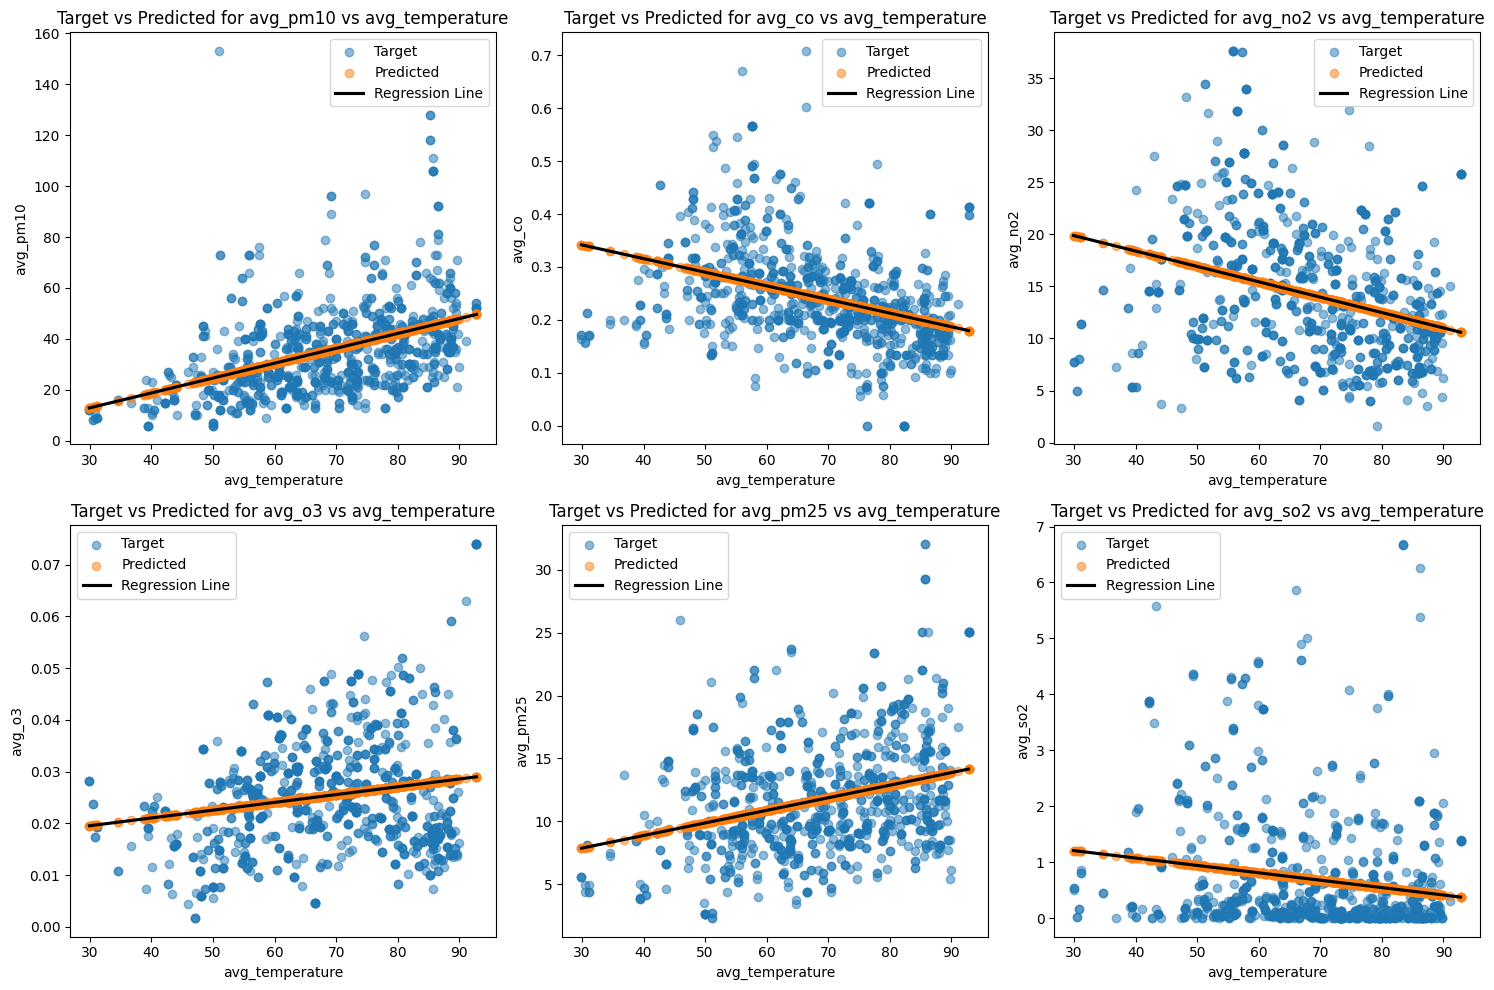

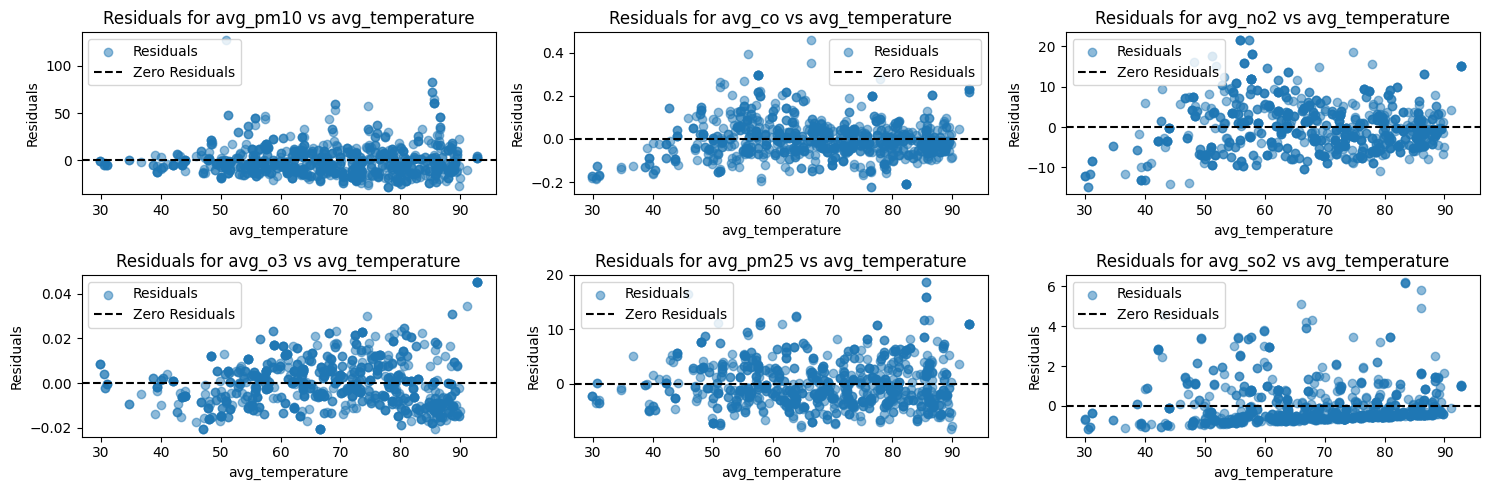

R-squared: 0.10144090688153108
Adjusted R-squared: 0.10048904343543097


In [18]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Load the CSV file
file_path = '/content/houston-aqi-2010-2021.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Selecting predictors and target variables
predictors = ['avg_temperature']
dependent_variables = ['avg_pm10', 'avg_co', 'avg_no2', 'avg_o3', 'avg_pm25', 'avg_so2']

# Creating the model
model = LinearRegression()
X, Y = df[predictors], df[dependent_variables]

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model fitting
model.fit(X_train, Y_train)

# Making predictions
Y_predictor = model.predict(X_test)

# Calculation for Mean Squared Error
mse = mean_squared_error(Y_test, Y_predictor)

# Print the results
print(f"Predictors: {predictors}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error on Test Set:", mse)


# plots for target vs predicted
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(predictors):
    for j, dependent_variable in enumerate(dependent_variables):
        plt.subplot(2, 3, j+1)
        plt.scatter(X_test[predictor], Y_test[dependent_variable], label='Target', alpha=0.5)
        plt.scatter(X_test[predictor], Y_predictor[:, j], label='Predicted', alpha=0.5)
        sns.regplot(x=X_test[predictor], y=Y_predictor[:, j], scatter=False, label='Regression Line', color='black')
        plt.title(f'Target vs Predicted for {dependent_variable} vs {predictor}')
        plt.xlabel(predictor)
        plt.ylabel(dependent_variable)
        plt.legend()

plt.tight_layout()
plt.show()

# Plots for residuals
residuals = Y_test - Y_predictor
plt.figure(figsize=(15, 5))
for i, dependent_variable in enumerate(dependent_variables):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test[predictor], residuals[dependent_variable], label='Residuals', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
    plt.title(f'Residuals for {dependent_variable} vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation
r_squared = r2_score(Y_test, Y_pred)
adjusted_r_squared = 1 - ((1 - r_squared) * (len(Y_test) - 1) / (len(Y_test) - len(predictors) - 1))

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")